# Feature Visualization - Regularization

Feature visualization in our approach is susceptible to high frequency noises. This notebook illustrates different ways of tackling the issue, partly following the content of a similar [notebook](https://github.com/tensorflow/lucid/blob/master/notebooks/feature-visualization/regularization.ipynb) in the [Lucid](https://github.com/tensorflow/lucid) repository.

## Imports and Setups

In [2]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render

In [3]:
# load a pre-trained model (without specifying any input shape!) and freeze its weights
inception_v3 = tf.keras.applications.InceptionV3(include_top=False)
inception_v3.trainable = False

# specify the size of images (height and width) to be generated
IMAGE_SIZE = 299

87916544/87910968 [==============================] - 1s 0us/step


## Regularization via Objective Function

High frequencies in the optimization result can be reduced by including a penalty on the variation of pixels in the image. This alters the objective function, and hence its maxima.

Without penalty on total pixel variation
Step 200


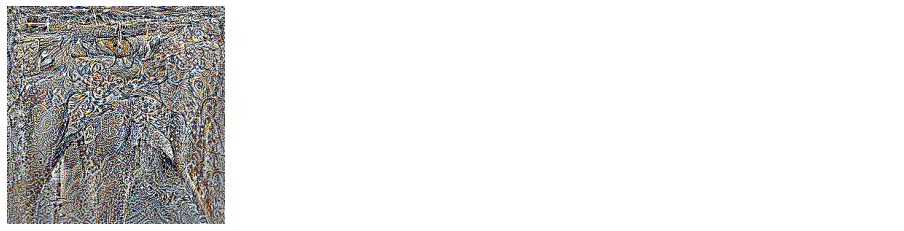

With penalty on total pixel variation
Step 200


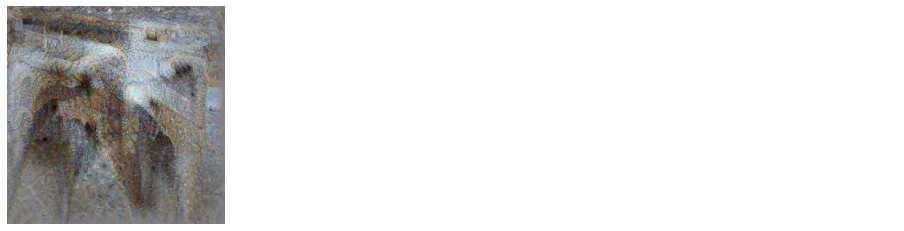

In [4]:
# impact of penalizing total variation of pixel values

obj = objectives.Channel(inception_v3, 'mixed7', 539)

print('Without penalty on total pixel variation')
_ = render.render_vis(obj, IMAGE_SIZE, freq_decay=0.0, transforms=[]) 

print('With penalty on total pixel variation')
obj_reg = obj - objectives.TotalVar() * 500
_ = render.render_vis(obj_reg, IMAGE_SIZE, freq_decay=0.0, transforms=[]) 

## Regularization via Parametrization

In the (frequency space) parametrization of an image, downscaling the high frequency modes would have the effect of reducing both their initial values and their changes during optimization. This does not change the maxima of the objective function.

Without frequency decay
Step 200


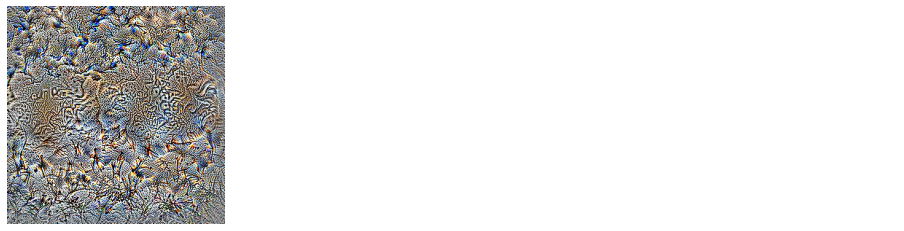

With frequency decay (at default rate)
Step 200


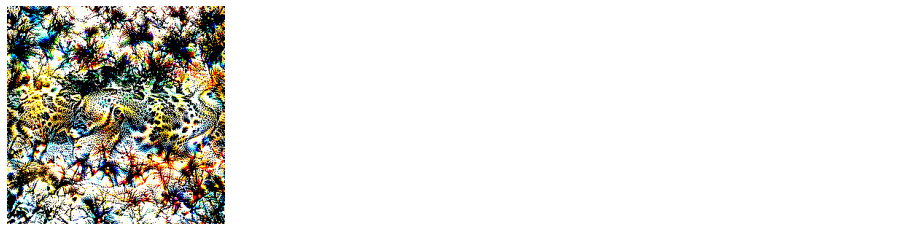

In [5]:
# impact of downscaling high frequencies

obj = objectives.Channel(inception_v3, 'mixed5', 480)

print('Without frequency decay')
_ = render.render_vis(obj, IMAGE_SIZE, freq_decay=0.0, transforms=[])

print('With frequency decay (at default rate)')
_ = render.render_vis(obj, IMAGE_SIZE, freq_decay=1.0, transforms=[]) 

## Regularization via Perturbations

During optimization, applying small perturbations at every step would encourage arrival at a result that is more robust to local noises. This does not change the maxima of the objective function.



Applying no perturbations
Step 200


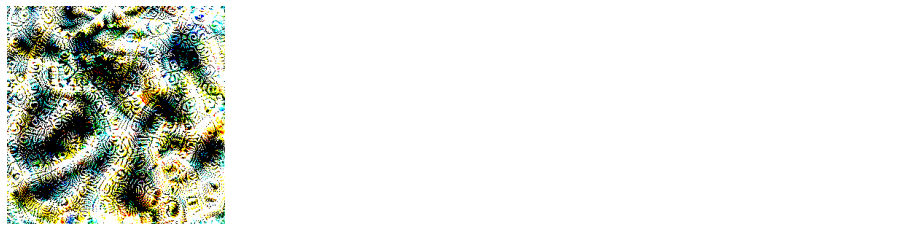

Applying random rotations
Step 200


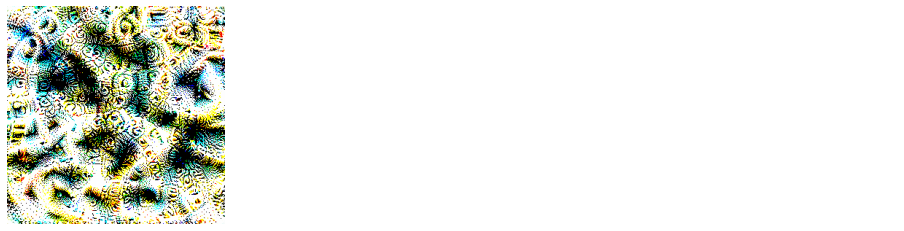

Applying the default perturbations (as in Lucid)
Step 200


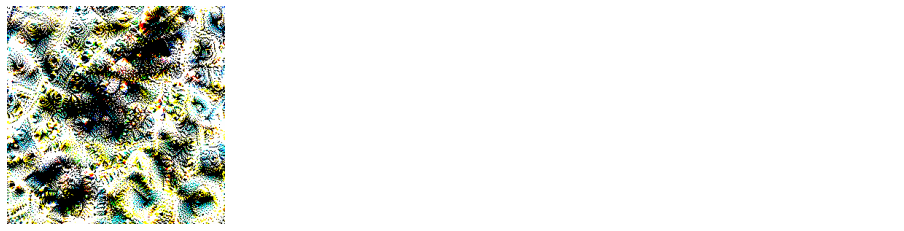

In [6]:
# impact of applying perturbations during optimization

obj = objectives.Channel(inception_v3, 'mixed7', 98)

print('Applying no perturbations')
_ = render.render_vis(obj, IMAGE_SIZE, transforms=[])

print('Applying random rotations')
transforms = [transformations.random_rotate(30)]
_ = render.render_vis(obj, IMAGE_SIZE, transforms=transforms) 

print('Applying the default perturbations (as in Lucid)')
transforms = transformations.default_list()
_ = render.render_vis(obj, IMAGE_SIZE, transforms=transforms) 

**Note.** In our examples, the effect of applying perturbations is not as pronounced as shown in the [Lucid tutorial](https://github.com/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb). This may have to do with our use of a different model, and will be investigated later.